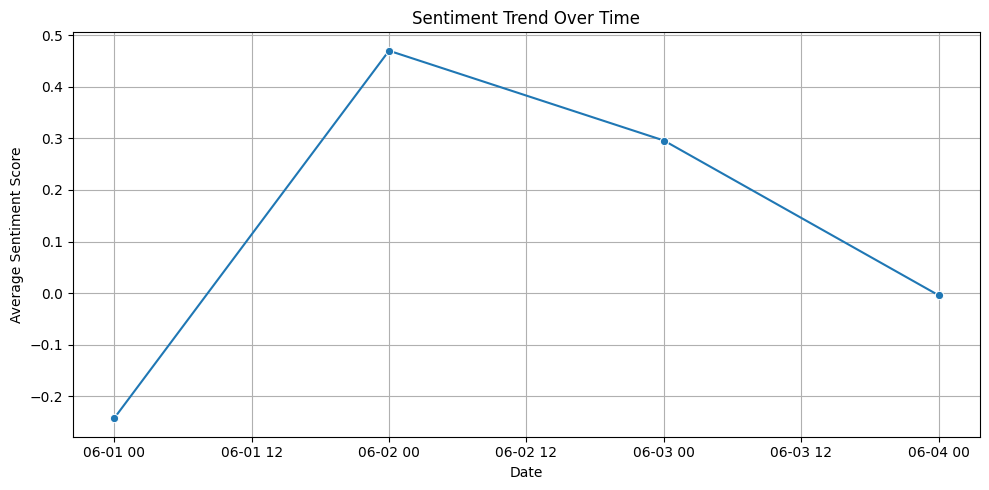

In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8],
    "username": ["user_a", "user_b", "user_c", "user_d", "user_e", "user_f", "user_g", "user_h"],
    "created_at": ["2025-06-01 10:12:00", "2025-06-01 12:45:00", "2025-06-02 08:20:00",
                   "2025-06-02 09:10:00", "2025-06-03 15:30:00", "2025-06-03 17:45:00",
                   "2025-06-04 13:00:00", "2025-06-04 18:22:00"],
    "post": [
        "I absolutely love the new iPhone! It's fantastic!",
        "The camera quality is terrible. I'm so disappointed.",
        "It's okay, nothing too special about this phone.",
        "Best phone ever! Super fast and sleek design.",
        "I regret buying this. Battery drains quickly.",
        "Not bad. Performs decently for the price.",
        "Loving it so far! Worth the money.",
        "Totally useless product. Waste of money."
    ]
}

df = pd.DataFrame(data)
df.to_csv("social_media_posts.csv", index=False)

df = pd.read_csv("social_media_posts.csv")
df['created_at'] = pd.to_datetime(df['created_at'])

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['post'].apply(get_sentiment)

df['sentiment_label'] = pd.cut(df['sentiment_score'],
                               bins=[-1, -0.1, 0.1, 1],
                               labels=["Negative", "Neutral", "Positive"])

df.set_index('created_at', inplace=True)
daily_sentiment = df.resample('D')['sentiment_score'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(data=daily_sentiment, marker='o')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.show()

df.reset_index().to_csv("sentiment_analysis_output.csv", index=False)
